### Lista 4 - Extragaláctica

Andressa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy.optimize import curve_fit
from scipy.integrate import quad, odeint
from sympy import *


plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15

Exercício 8

In [2]:
#coordenadas Coma Cluster
c = SkyCoord('12h59m48.7s', '+27d58m50s', frame='icrs')
c  

<SkyCoord (ICRS): (ra, dec) in deg
    (194.95291667, 27.98055556)>

Query:
```sql
select p.objid, p.ra, p.dec, p.g, s.z as redshift
from galaxy p, specobj s, dbo.fgetNearByObjEq(194.95291667,27.98055556,180) n
where p.objid=s.bestobjid and p.objid=n.objid and s.bestobjid=n.objid
```

In [3]:
data = Table.read('coma_data.fits', format='fits')
print(data.colnames)

['objid', 'ra', 'dec', 'g', 'redshift']


In [4]:
len(data)

6697

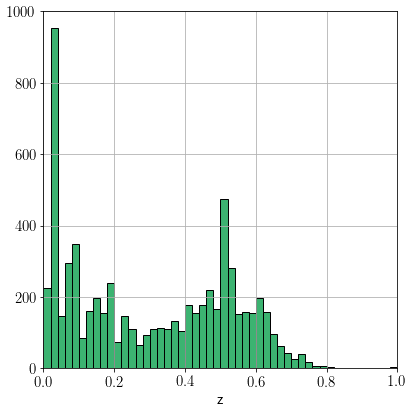

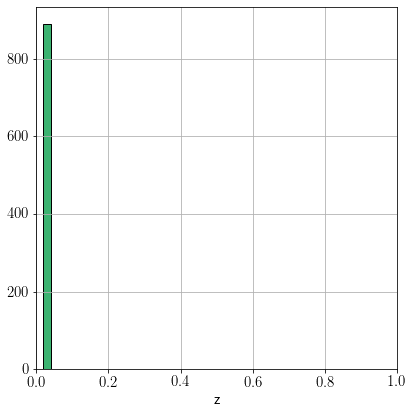

In [5]:
#redshift Coma Cluster
z = np.array(data['redshift'])

plt.figure(figsize=[6,6])
bins = np.linspace(0.0, 1.0, 51)
plt.hist(z, bins=bins, ec="black", fc="mediumseagreen")
plt.xlabel("z")
plt.xlim(0,1)
plt.grid(True)
plt.tight_layout()


mask_z = (data['redshift'] > 0.02) & (data['redshift'] < 0.03)
z = np.array(data['redshift'][mask_z])

plt.figure(figsize=[6,6])
bins = np.linspace(0.0, 1.0, 51)
plt.hist(z, bins=bins, ec="black", fc="mediumseagreen")
plt.xlabel("z")
plt.xlim(0,1)
plt.grid(True)
plt.tight_layout()

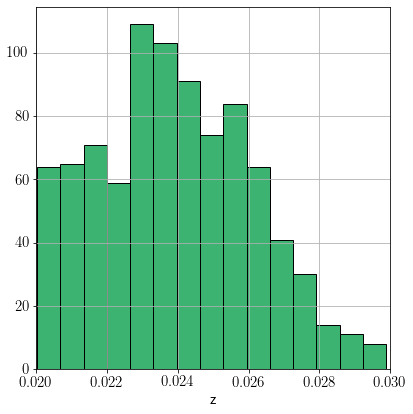

In [6]:
mask_z = (data['redshift'] > 0.02) & (data['redshift'] < 0.03)

z = np.array(data['redshift'][mask_z])

plt.figure(figsize=[6,6])
plt.hist(z, bins='auto', ec="black", fc="mediumseagreen")
plt.xlabel("z")
plt.xlim(0.02,0.03)
plt.grid(True)
plt.tight_layout()

In [7]:
coma = data[mask_z]
coma

objid,ra,dec,g,redshift
int64,float64,float64,float32,float32
1237667444048724058,195.02367244819052,27.92646372537734,18.307228,0.026532665
1237667323260239967,193.26685314985966,27.464524961737276,17.739439,0.022880102
1237665442590294043,196.90672386670298,29.92677209213581,17.613495,0.02536382
1237667444048592948,194.7330846129095,27.83337239524289,14.839222,0.025102785
1237667324334374924,194.37496696160014,28.188071822202936,14.74595,0.023128286
1237665443126247518,194.57746265466045,30.538019984943105,16.84223,0.02522906
1237667444585201702,194.14663081960066,28.275457472547043,15.603621,0.024334192
1237667442974654524,194.18132373368903,27.17879518844555,13.734673,0.025310293
1237667255092969508,194.11478641037587,30.43328800468621,17.668453,0.025309322


In [8]:
z_mean = np.mean(coma['redshift'])
z_mean

0.023916803

In [9]:
#distância 
H0 = 70 #km/s/Mpc
c = 3e5 #km/s
d = (c/H0)*z_mean 

d #Mpc

102.50058557306016

In [10]:
#magnitudes absolutas na banda g
d = d *1e6 #pc
mag_ap = np.array(coma['g'])
mag = mag_ap -5*np.log10(d) + 5
coma['mag abs'] = mag_ap -5*np.log10(d) + 5

In [11]:
#luminosidade
L_sol = 1 #Lsun
mag_sol = 4.83
L = L_sol * 10**((mag - mag_sol)/(2.5)) #Lsun
coma['L'] = L

In [12]:
#soma das luminosidades
L_tot = sum(L)
L_tot #Lsun

7.603097996744523e-07

In [13]:
#metade da luminosidade para cálculo do raio efetivo
L_tot_2 = L_tot/2
L_tot_2 #Lsun

3.8015489983722617e-07

In [14]:
ra_mean = np.mean(coma['ra'])
dec_mean = np.mean(coma['dec'])

ra_mean = np.radians(ra_mean)
dec_mean = np.radians(dec_mean)

ra = np.radians(np.array(coma['ra']))
dec = np.radians(np.array(coma['dec']))

In [15]:
#distância angular das galáxias do cluster
cos_theta = np.sin(dec)*np.sin(dec_mean) + np.cos(dec)*np.cos(dec_mean)*np.cos(ra-ra_mean)
theta = np.arccos(cos_theta)

theta_ordem = np.sort(theta)
coma['dist ang'] = theta_ordem

In [16]:
#raio efetivo
L_cum = np.cumsum(coma['L'])

r = [np.where(L_cum < L_tot_2)[0][-1]]
r_eff = d * np.sin(theta_ordem)[r][0]

r_eff #pc

1768068.5766029065

In [17]:
#raio G
r_G = r_eff * 3
r_G #pc
r_G = r_G/1e6 #Mpc

In [18]:
r_G

5.30420572980872

In [19]:
#dispersão de velocidades
c = 3e5 #km/s
vel = np.array(coma['redshift']-z_mean)*c
std_vel = np.std(vel)
std_vel #km/s

654.86957

In [20]:
M = 1.1e15 * (std_vel/1000)**2 * r_G
M #Msun

2502203709039760.0

Exercício 9

a)

In [21]:
M_200 = 5e14 #Msun

H0 = 70.0
h = H0/100.0

rho_crit = 277 * h**2 #Msun/kpc³

In [22]:
r_200_3 = M_200/((4*np.pi/3)*200*rho_crit)
r_200 = r_200_3**(1/3)
r_200 #kpc

1638.2940353499241

In [23]:
z = 0

In [24]:
c = (6.71/(1+z)**0.44)*(M_200/(h**(-1)*2*10**12))**(-0.091)
c

4.193783993076173

In [25]:
r_s = r_200/c
r_s #kpc

390.6481683498016

In [26]:
rho_s = (200/3)*rho_crit*((c**3)/(np.log(1+c)-c/(1+c)))
rho_s #Msun/kpc³

794553.7539336638

In [27]:
r = np.logspace(0,4,50)
rho_nfw = rho_s/((r/r_s)*(1+r/r_s)**2)

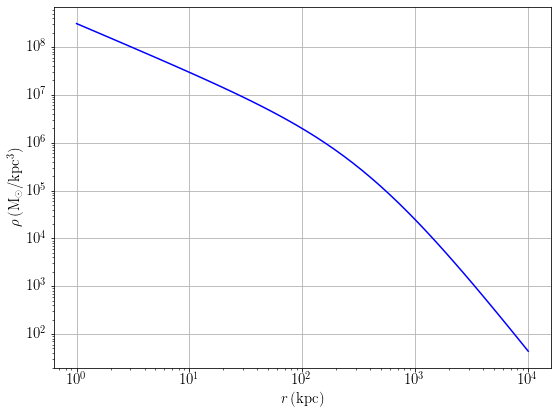

In [28]:
plt.figure(figsize=[8,6])
plt.plot(r, rho_nfw, 'b-') 
plt.xlabel('$r \,(\mathrm{kpc})$')
plt.ylabel(r'$\rho \,(\mathrm{{M}_\odot/kpc^3})$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.tight_layout()
#plt.savefig('9a')

b)

In [29]:
a_h = r_s *np.sqrt(2*(np.log(1+c)-(c/(1+c))))
a_h #kpc

506.33800938013803

In [30]:
r = np.logspace(0,4,50)
rho_nfw = rho_s/((r/r_s)*(1+r/r_s)**2)
rho_hern = (M_200/(2*np.pi))*(a_h/(r*(r+a_h)**3))

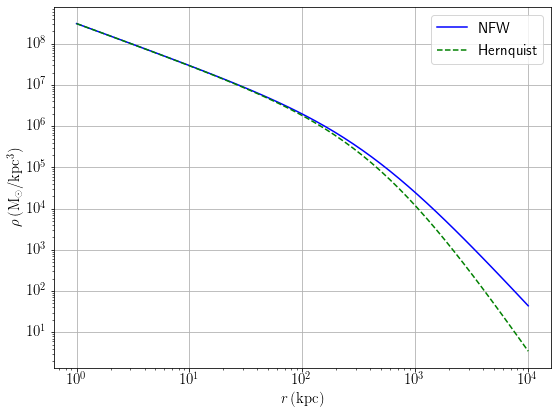

In [31]:
plt.figure(figsize=[8,6])
plt.plot(r, rho_nfw, 'b-', label='NFW')
plt.plot(r, rho_hern, 'g--', label='Hernquist')
plt.xlabel('$r \,(\mathrm{kpc})$')
plt.ylabel(r'$\rho \,(\mathrm{{M}_\odot/kpc^3})$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('9b')

c)

In [32]:
n_e = 5e-3 #cm⁻³
r_c = 100 #kpc
beta = 0.7

In [33]:
m_H = 1.673e-27 #kg massa do próton

In [34]:
f_gas = 0.15
Mg = f_gas*M_200/(1-f_gas)
Mg #Msun

88235294117647.06

In [35]:
X = 0.76
mu_e = 2/(X+1)
mu_e

1.1363636363636365

In [36]:
rho_0 = mu_e*n_e*m_H
rho_0 #kg/cm³

9.505681818181821e-30

In [37]:
#kg = 5.0279e-31 Msun
#cm³ = 3.40368e-65 kpc³
rho_0 = 5.0279e-31/3.40368e-65 * rho_0 #Msun/kpc³
rho_0

140417.48229456466

In [38]:
a_g = (3*Mg/(4*np.pi*rho_0))**(1/3)
a_g #kpc

531.3461223308876

In [39]:
r = np.logspace(0,4,50)
rho_g = ((3*Mg)/(4*np.pi))*(a_g/(r+a_g)**4)
rho_beta = (rho_0)/(1+(r/r_c)**2)**(3*beta/2)

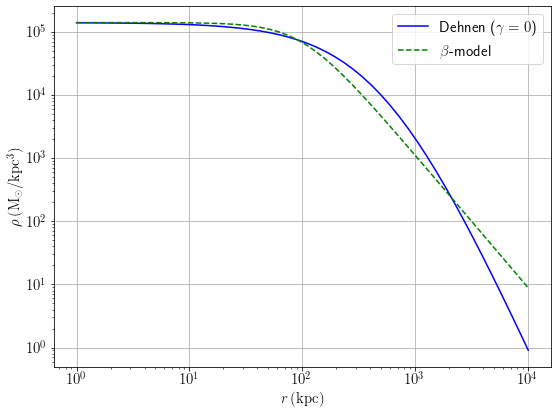

In [40]:
plt.figure(figsize=[8,6])
plt.plot(r, rho_g, 'b-', label='Dehnen ($\gamma = 0$)')
plt.plot(r, rho_beta, 'g--', label=r'$\beta$-model')
plt.xlabel('$r \,(\mathrm{kpc})$')
plt.ylabel(r'$\rho \,(\mathrm{{M}_\odot/kpc^3})$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('9c')

d)

In [41]:
r = np.logspace(0,4,50)
func_f_gas = (Mg * (r/(r + a_g))**3)/(Mg * (r/(r + a_g))**3 + M_200 * (r/(r + a_h))**2)

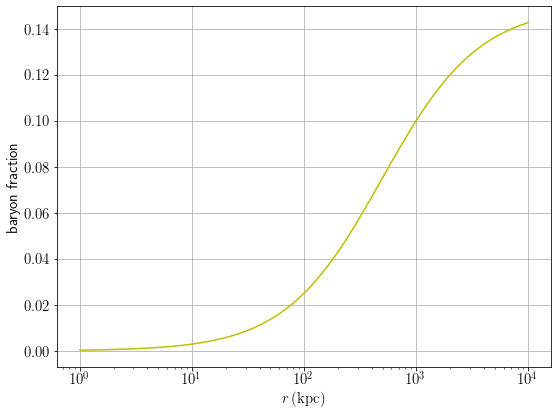

In [42]:
plt.figure(figsize=[8,6])
plt.plot(r, func_f_gas, 'y-')
plt.xlabel('$r \,(\mathrm{kpc})$')
plt.ylabel('baryon fraction')
plt.xscale('log')
plt.grid()
plt.tight_layout()
#plt.savefig('9d')

e)

In [43]:
r = np.linspace(0,800,50)

In [44]:
k = 1.373e-23 #J/K
G = 6.6743e-11 #m³ kg⁻¹ s⁻² ?

In [45]:
#kg = 5.0279e-31 Msun
#m³ = 3.40368e-59 kpc³
#G = G * 3.40368e-59/5.0279e-31 #kpc³ Msun⁻¹ s⁻²

In [46]:
def integral(r):
    i = (a_g/(r+a_g)**4) * (M_200/(r+a_h)**2 + Mg/(r+a_g)**3)
    return i

In [47]:
i, err = quad(integral, 0, np.inf)
T = (mu_e*m_H/k) * (1/rho_g) * (3*Mg/(4*np.pi)) * G * i
T

array([1.89916562e-03, 1.90211830e-03, 1.90568616e-03, 1.90999851e-03,
       1.91521236e-03, 1.92151860e-03, 1.92914964e-03, 1.93838898e-03,
       1.94958308e-03, 1.96315652e-03, 1.97963109e-03, 1.99965029e-03,
       2.02401106e-03, 2.05370506e-03, 2.08997325e-03, 2.13437866e-03,
       2.18890473e-03, 2.25608989e-03, 2.33921436e-03, 2.44256295e-03,
       2.57180039e-03, 2.73451543e-03, 2.94102221e-03, 3.20555937e-03,
       3.54811461e-03, 3.99724856e-03, 4.59454271e-03, 5.40173263e-03,
       6.51235915e-03, 8.07115659e-03, 1.03069245e-02, 1.35893095e-02,
       1.85287095e-02, 2.61552389e-02, 3.82449241e-02, 5.79241740e-02,
       9.08075102e-02, 1.47170298e-01, 2.46153787e-01, 4.24002869e-01,
       7.50381277e-01, 1.36100054e+00, 2.52343781e+00, 4.77090219e+00,
       9.17587778e+00, 1.79130676e+01, 3.54230951e+01, 7.08279907e+01,
       1.42962549e+02, 2.90885454e+02])

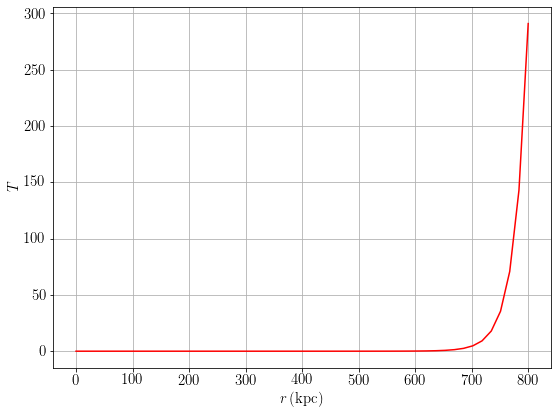

In [48]:
plt.figure(figsize=[8,6])
plt.plot(r, T, 'r-')
plt.xlabel('$r \,(\mathrm{kpc})$')
plt.ylabel('$T$')# \,(\mathrm{keV})$')
plt.grid()
plt.tight_layout()
#plt.savefig('9d')

f)

In [49]:
def L(r):
    T = (mu_e*m_H/k) * (1/rho_g) * (3*Mg/(4*np.pi)) * G * (a_g/(r+a_g)**4) * (M_200/(r+a_h)**2 + Mg/(r+a_g)**3)
    e = 3e-27 * T**(1/2) * n_e
    integral = 4*np.pi * r**2 * e
    return integral

In [50]:
lum, err = quad(L, 0, r_200)
lum

TypeError: only size-1 arrays can be converted to Python scalars

g)

In [ ]:
r = np.logspace(0,4,50)
rho_g_1 = ((2*Mg)/(4*np.pi))*(a_g/(r*(r+a_g)**3))
rho_beta = (rho_0)/(1+(r/r_c)**2)**(3*beta/2)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(r, rho_g_1, 'b-', label='Dehnen ($\gamma = 1$)')
plt.plot(r, rho_beta, 'g--', label=r'$\beta$-model')
plt.xlabel('$r \,(\mathrm{kpc})$')
plt.ylabel(r'$\rho \,(\mathrm{{M}_\odot/kpc^3})$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('9g1')

In [ ]:
r = np.logspace(0,4,50)
func_f_gas_1 = (Mg * (r/(r + a_g))**2)/(Mg * (r/(r + a_g))**2 + M_200 * (r/(r + a_h))**2)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(r, func_f_gas_1, 'y-')
plt.xlabel('$r \,(\mathrm{kpc})$')
plt.ylabel('baryon fraction')
plt.xscale('log')
plt.grid()
plt.tight_layout()
#plt.savefig('9g2')